# Data Preprocessing Steps:

In [754]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics, tree
from sklearn.preprocessing import StandardScaler
from sklearn import svm

[Crop_recommendation.csv](Crop_recommendation.csv)


In [755]:
df = pd.read_csv("Crop_recommendation.csv")

In [756]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [757]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [758]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Renaming some column names for clarity

In [759]:
df.rename(columns={'N':'nitrogen', 'P':'phosphorus', 'K':'potassium', 'label': 'crop_type'}, inplace=True)

In [760]:
df.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'crop_type'],
      dtype='object')

### Handling Missing Data

Only one column has an invalid zero minimum value:

1. nitrogen - ratio of Nitrogen content in soil

In [761]:
col_missing = pd.Series(['nitrogen'])
num_missing = (df[col_missing] == 0).sum()
print(num_missing)                  

nitrogen    27
dtype: int64


In [762]:
df1 = df
df1[col_missing] = df1[col_missing].replace(0, np.nan)
print(df1.isnull().sum())

nitrogen       27
phosphorus      0
potassium       0
temperature     0
humidity        0
ph              0
rainfall        0
crop_type       0
dtype: int64


In [763]:
df1 = df1.dropna()

In [764]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2173 non-null   float64
 1   phosphorus   2173 non-null   int64  
 2   potassium    2173 non-null   int64  
 3   temperature  2173 non-null   float64
 4   humidity     2173 non-null   float64
 5   ph           2173 non-null   float64
 6   rainfall     2173 non-null   float64
 7   crop_type    2173 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 152.8+ KB


### Independent Variables

In [765]:
numeric_columns = ['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity',
                  'ph', 'rainfall']
ind_columns = numeric_columns

For this dataset, all columns are independent except for 'label' which is dependent on soil and rainfall conditions as described by the independent variable columns

### Encoding the Dependent Variable

In [766]:
df1['crop_type'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [767]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nitrogen           2173 non-null   float64
 1   phosphorus         2173 non-null   int64  
 2   potassium          2173 non-null   int64  
 3   temperature        2173 non-null   float64
 4   humidity           2173 non-null   float64
 5   ph                 2173 non-null   float64
 6   rainfall           2173 non-null   float64
 7   crop_type          2173 non-null   object 
 8   crop_type_encoded  2173 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 169.8+ KB


In [768]:
X = df2[ind_columns].values.reshape(-1,7)
y = df2[['crop_type_encoded']].values.reshape(-1,1)
trainX,testX,trainY,testY = train_test_split(X, y, test_size=.2, random_state=42)

### Splitting Training and Testing Data

In [769]:
print('Split X: ',trainX.shape, testX.shape)
print('Split Y: ',trainY.shape, testY.shape)

Split X:  (1738, 7) (435, 7)
Split Y:  (1738, 1) (435, 1)


### Normalization & Standardization

In [770]:
original = df2[numeric_columns]
# Standardize dataframe and return as an array
standardizedArray = preprocessing.scale(original)

# Convert standardized array to dataframe 'standardized'
standardized = pd.DataFrame(standardizedArray, columns=numeric_columns)
standardized

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,1.057705,-0.346138,-0.101399,-0.933285,0.474684,0.040245,1.806800
1,0.921473,0.140479,-0.141036,-0.757452,0.399043,0.732495,2.237559
2,0.240314,0.049238,-0.081581,-0.513855,0.488976,1.770153,2.915092
3,0.621763,-0.559033,-0.160854,0.174426,0.391795,0.657857,2.531909
4,0.730749,-0.346138,-0.121217,-1.081253,0.456803,1.496241,2.892448
...,...,...,...,...,...,...,...
2168,1.520893,-0.589446,-0.319400,0.230398,-0.225925,0.398690,1.349871
2169,1.302922,-1.167303,-0.418492,0.357226,-0.665311,-0.497999,0.444587
2170,1.820602,-0.619860,-0.359037,-0.291312,-0.189440,-0.141356,1.269028
2171,1.793356,-0.650273,-0.279764,0.131258,-0.867949,0.371172,0.430979


In [771]:
# Normalize dataframe and return as an array
normalizedArray = preprocessing.MinMaxScaler().fit_transform(df2[numeric_columns])

# Convert normalized array to dataframe 'normalized'
normalized = pd.DataFrame(normalizedArray, columns=numeric_columns)
normalized

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,0.640288,0.264286,0.190,0.345886,0.790267,0.466264,0.656458
1,0.604317,0.378571,0.180,0.371445,0.770633,0.549480,0.741675
2,0.424460,0.357143,0.195,0.406854,0.793977,0.674219,0.875710
3,0.525180,0.214286,0.175,0.506901,0.768751,0.540508,0.799905
4,0.553957,0.264286,0.185,0.324378,0.785626,0.641291,0.871231
...,...,...,...,...,...,...,...
2168,0.762590,0.207143,0.135,0.515037,0.608410,0.509353,0.566064
2169,0.705036,0.071429,0.110,0.533473,0.494359,0.401561,0.386972
2170,0.841727,0.200000,0.125,0.439202,0.617880,0.444433,0.550071
2171,0.834532,0.192857,0.145,0.500627,0.441760,0.506045,0.384280


### Split Dataset into Training and Testing Sets

In [773]:
X = df2[ind_columns].values.reshape(-1,7)
y = df2['crop_type_encoded']


In [774]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [775]:
print('Split X: ', trainX.shape, testX.shape)
print('Split Y: ', trainY.shape, testY.shape)

Split X:  (1738, 7) (435, 7)
Split Y:  (1738,) (435,)


### Feature Scaling 

In [776]:
original = df2[numeric_columns]
standardizedArray = preprocessing.scale(original)
df_standardized = pd.DataFrame(standardizedArray, columns=numeric_columns)
df_standardized

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,1.057705,-0.346138,-0.101399,-0.933285,0.474684,0.040245,1.806800
1,0.921473,0.140479,-0.141036,-0.757452,0.399043,0.732495,2.237559
2,0.240314,0.049238,-0.081581,-0.513855,0.488976,1.770153,2.915092
3,0.621763,-0.559033,-0.160854,0.174426,0.391795,0.657857,2.531909
4,0.730749,-0.346138,-0.121217,-1.081253,0.456803,1.496241,2.892448
...,...,...,...,...,...,...,...
2168,1.520893,-0.589446,-0.319400,0.230398,-0.225925,0.398690,1.349871
2169,1.302922,-1.167303,-0.418492,0.357226,-0.665311,-0.497999,0.444587
2170,1.820602,-0.619860,-0.359037,-0.291312,-0.189440,-0.141356,1.269028
2171,1.793356,-0.650273,-0.279764,0.131258,-0.867949,0.371172,0.430979


In [777]:
normalizedArray = preprocessing.MinMaxScaler().fit_transform(df2[numeric_columns])
df_normalized = pd.DataFrame(normalizedArray, columns=numeric_columns)
df_normalized

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,0.640288,0.264286,0.190,0.345886,0.790267,0.466264,0.656458
1,0.604317,0.378571,0.180,0.371445,0.770633,0.549480,0.741675
2,0.424460,0.357143,0.195,0.406854,0.793977,0.674219,0.875710
3,0.525180,0.214286,0.175,0.506901,0.768751,0.540508,0.799905
4,0.553957,0.264286,0.185,0.324378,0.785626,0.641291,0.871231
...,...,...,...,...,...,...,...
2168,0.762590,0.207143,0.135,0.515037,0.608410,0.509353,0.566064
2169,0.705036,0.071429,0.110,0.533473,0.494359,0.401561,0.386972
2170,0.841727,0.200000,0.125,0.439202,0.617880,0.444433,0.550071
2171,0.834532,0.192857,0.145,0.500627,0.441760,0.506045,0.384280


# Random Forest Algorithm

In [778]:
y = df3[['crop_type']]
X = df_normalized[numeric_columns]

In [779]:
rfModel = RandomForestClassifier(max_depth=5, max_features='sqrt', random_state=99)
rfModel.fit(X, y.values.ravel())

RandomForestClassifier(max_depth=5, random_state=99)

/Users/raniyarehman/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Cross-Entropy:  0.7625954799258472
Error State:  0.030832949838932366


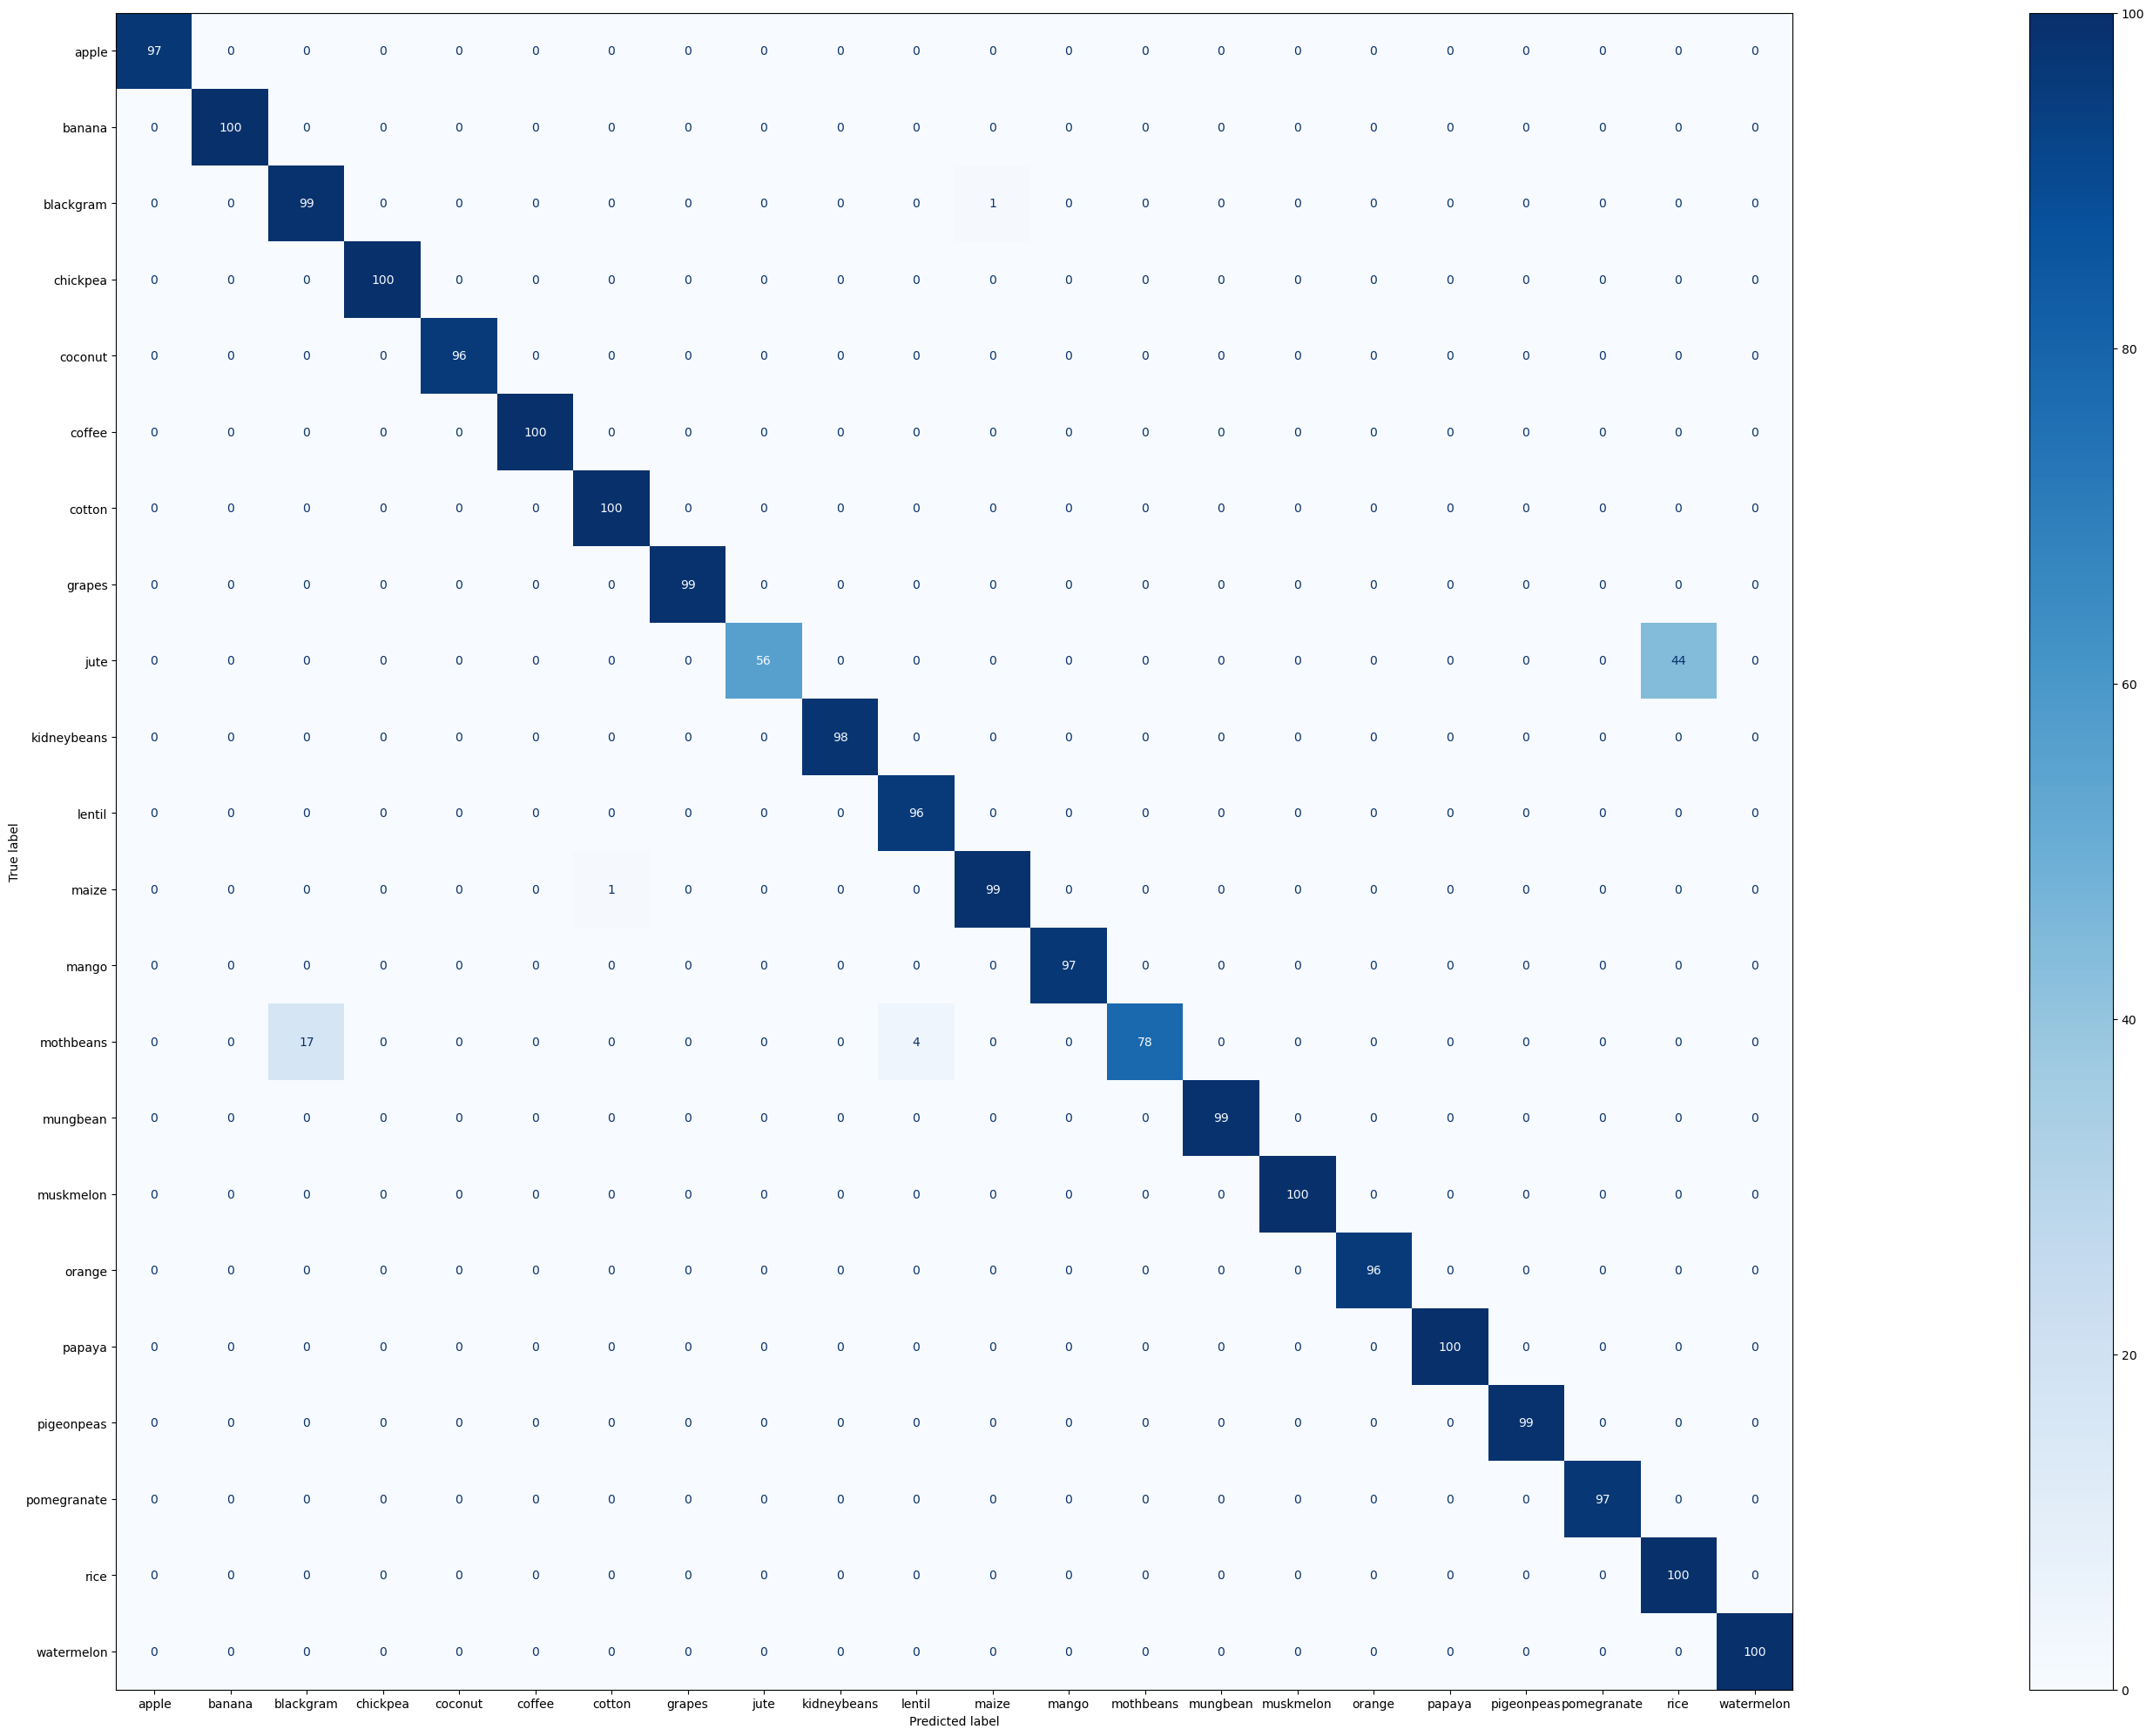

In [780]:
print("Cross-Entropy: ", metrics.log_loss(y, rfModel.predict_proba(X)))
print("Error State: ", 1 - metrics.accuracy_score(y, rfModel.predict(X)))

y_pred = rfModel.predict(X)

cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(70, 25))  # Adjust the figsize as needed

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfModel.classes_)
disp.plot(cmap='Blues', values_format='d', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.show()

In [781]:
print(classification_report(y, rfModel.predict(X)))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        97
      banana       1.00      1.00      1.00       100
   blackgram       0.85      0.99      0.92       100
    chickpea       1.00      1.00      1.00       100
     coconut       1.00      1.00      1.00        96
      coffee       1.00      1.00      1.00       100
      cotton       0.99      1.00      1.00       100
      grapes       1.00      1.00      1.00        99
        jute       1.00      0.56      0.72       100
 kidneybeans       1.00      1.00      1.00        98
      lentil       0.96      1.00      0.98        96
       maize       0.99      0.99      0.99       100
       mango       1.00      1.00      1.00        97
   mothbeans       1.00      0.79      0.88        99
    mungbean       1.00      1.00      1.00        99
   muskmelon       1.00      1.00      1.00       100
      orange       1.00      1.00      1.00        96
      papaya       1.00    

# Support Vector Machines

In [782]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nitrogen           2173 non-null   float64
 1   phosphorus         2173 non-null   int64  
 2   potassium          2173 non-null   int64  
 3   temperature        2173 non-null   float64
 4   humidity           2173 non-null   float64
 5   ph                 2173 non-null   float64
 6   rainfall           2173 non-null   float64
 7   crop_type          2173 non-null   object 
 8   crop_type_encoded  2173 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 169.8+ KB


In [783]:
df5 = df2.drop('crop_type', axis=1)
X = df5[ind_columns].values.reshape(-1,7)
y = df5['crop_type_encoded']
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [784]:
class_distribution = df5['crop_type_encoded'].value_counts()
print(class_distribution)

crop_type_encoded
20    100
1     100
8     100
6     100
17    100
15    100
21    100
11    100
5     100
2     100
3     100
7      99
14     99
13     99
18     99
9      98
19     97
0      97
12     97
10     96
16     96
4      96
Name: count, dtype: int64


In [785]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(trainX, trainY)
y_pred_linear = svm_linear.predict(testX)

In [786]:
print('Linear Accuracy: ', metrics.accuracy_score(testY, y_pred_linear))
print('Linear Precision: ', metrics.precision_score(testY, y_pred_linear, average='weighted'))
print('Linear Recall: ', metrics.recall_score(testY, y_pred_linear, average='weighted'))

Linear Accuracy:  0.9839080459770115
Linear Precision:  0.9857147833009903
Linear Recall:  0.9839080459770115


In [787]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(trainX, trainY)
y_pred_rbf = svm_rbf.predict(testX)

In [788]:
print('RBF Accuracy: ', metrics.accuracy_score(testY, y_pred_rbf))
print('RBF Precision: ', metrics.precision_score(testY, y_pred_rbf, average='weighted'))
print('RBF Recall: ', metrics.recall_score(testY, y_pred_rbf, average='weighted'))

RBF Accuracy:  0.9770114942528736
RBF Precision:  0.9807183908045979
RBF Recall:  0.9770114942528736


In [789]:
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(trainX, trainY)
y_pred_poly = svm_poly.predict(testX)

In [790]:
print('Poly Accuracy: ', metrics.accuracy_score(testY, y_pred_poly))
print('Poly Precision: ', metrics.precision_score(testY, y_pred_poly, average='weighted'))
print('Poly Recall: ', metrics.recall_score(testY, y_pred_poly, average='weighted'))

Poly Accuracy:  0.9747126436781609
Poly Precision:  0.9760597352838731
Poly Recall:  0.9747126436781609
